In [2]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
iris = load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_df['species'] = iris.target
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [3]:
from sklearn.model_selection import train_test_split
X = iris_df.drop(['species'], axis = 1)
y = iris_df['species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 13)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(120, 4) (30, 4) (120,) (30,)


In [4]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state = 13)
model.fit(X_train, y_train)
predicted = model.predict(X_test)

In [5]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(predicted, y_test)
print(f'Accuracy: {accuracy}')

Accuracy: 0.9333333333333333


/home/pmpakos/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


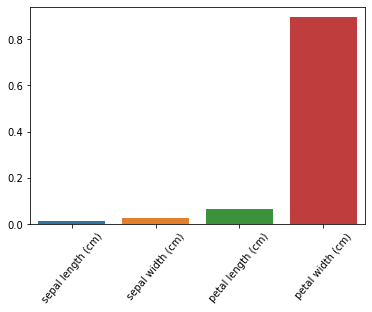

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.barplot(iris_df.columns[:4], model.feature_importances_)
plt.xticks(rotation = 50)
plt.show()

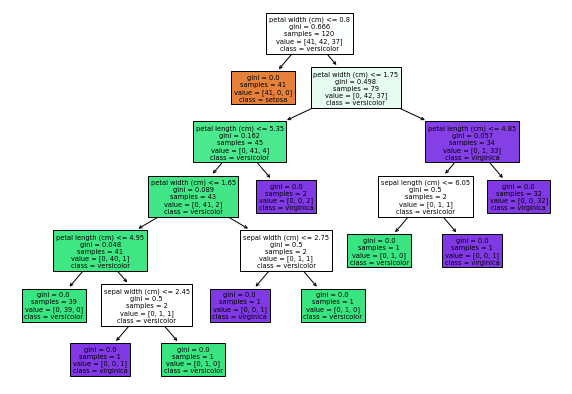

In [9]:
from sklearn import tree
fig = plt.figure(figsize = (10, 7))
tree.plot_tree(model, feature_names = iris.feature_names, class_names = iris.target_names, filled = True)
plt.show()